
For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [6]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [7]:
df= pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [8]:
# first we will sort the data with the date filed
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df.head()

,ID,Date,Element,Data_Value
60995,USW00004848,2005-01-01,TMIN,0
17153,USC00207320,2005-01-01,TMAX,150
17155,USC00207320,2005-01-01,TMIN,-11
10079,USW00014833,2005-01-01,TMIN,-44
10073,USW00014833,2005-01-01,TMAX,33


In [9]:
# let's convertt the date to date index to work easy with it 
date_index = pd.DatetimeIndex(df['Date'])
date_index


DatetimeIndex(['2005-01-01', '2005-01-01', '2005-01-01', '2005-01-01',
               '2005-01-01', '2005-01-01', '2005-01-01', '2005-01-01',
               '2005-01-01', '2005-01-01',
               ...
               '2015-12-31', '2015-12-31', '2015-12-31', '2015-12-31',
               '2015-12-31', '2015-12-31', '2015-12-31', '2015-12-31',
               '2015-12-31', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=165085, freq=None)

In [10]:
# removing tht leap year
df = df[~((date_index.is_leap_year) & (date_index.month == 2) & (date_index.day == 29))]

In [11]:
df.head()

,ID,Date,Element,Data_Value
60995,USW00004848,2005-01-01,TMIN,0
17153,USC00207320,2005-01-01,TMAX,150
17155,USC00207320,2005-01-01,TMIN,-11
10079,USW00014833,2005-01-01,TMIN,-44
10073,USW00014833,2005-01-01,TMAX,33


In [12]:
#Refreshing the date_index after Removing the leap days
date_index = pd.DatetimeIndex(df['Date'])
date_index

DatetimeIndex(['2005-01-01', '2005-01-01', '2005-01-01', '2005-01-01',
               '2005-01-01', '2005-01-01', '2005-01-01', '2005-01-01',
               '2005-01-01', '2005-01-01',
               ...
               '2015-12-31', '2015-12-31', '2015-12-31', '2015-12-31',
               '2015-12-31', '2015-12-31', '2015-12-31', '2015-12-31',
               '2015-12-31', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=165002, freq=None)

In [13]:
# let's create a month col and day col
#The main index will be the Month-Day combination
df["Month"] = date_index.month
df["Day"] = date_index.day
df.head()

,ID,Date,Element,Data_Value,Month,Day
60995,USW00004848,2005-01-01,TMIN,0,1,1
17153,USC00207320,2005-01-01,TMAX,150,1,1
17155,USC00207320,2005-01-01,TMIN,-11,1,1
10079,USW00014833,2005-01-01,TMIN,-44,1,1
10073,USW00014833,2005-01-01,TMAX,33,1,1


In [14]:
# we need the data till 2014
df_2015 = df[date_index >= "2015-01-01"]
df = df[date_index < "2015-01-01"]

In [15]:
# now i want to get the mox value for evey day in a month so we will group the data by mothe and the day
df_max = df[df['Element'] == 'TMAX'].groupby(['Month','Day'])['Data_Value'].max()
df_max.head()

Month  Day
1      1      156
       2      139
       3      133
       4      106
       5      128
Name: Data_Value, dtype: int64

In [16]:
# now let's get the min value
df_min = df[df['Element'] == 'TMIN'].groupby(['Month','Day'])['Data_Value'].min()
df_min.head()

Month  Day
1      1     -160
       2     -267
       3     -267
       4     -261
       5     -150
Name: Data_Value, dtype: int64

In [17]:
#The 2015 maximum temperatures records 
data_2015_max = df_2015[df_2015["Element"]=="TMAX"].groupby(["Month", "Day"])["Data_Value"].max()
data_2015_max = data_2015_max / 10
data_2015_max.head()

Month  Day
1      1      1.1
       2      3.9
       3      3.9
       4      4.4
       5      2.8
Name: Data_Value, dtype: float64

In [18]:
#The minimum temperatures records
#The 2015 minimum temperatures records
data_2015_min = df_2015[df_2015["Element"]=="TMIN"].groupby(["Month", "Day"])["Data_Value"].min()
data_2015_min = data_2015_min / 10
data_2015_min.head()

Month  Day
1      1     -13.3
       2     -12.2
       3      -6.7
       4      -8.8
       5     -15.5
Name: Data_Value, dtype: float64

In [19]:
#When where the records broken?
import numpy as np
max_rec_broken = (data_2015_max > df_max).as_matrix()
print(np.sum(max_rec_broken))
min_rec_broken = (data_2015_min < df_min).as_matrix()
print(np.sum(min_rec_broken))

0
116


In [20]:
# now it's time to plot the data
observation_axis = np.arange('2015-01-01', '2016-01-01', dtype='datetime64[D]')
observation_axis = np.array(list(map(pd.to_datetime, observation_axis)))

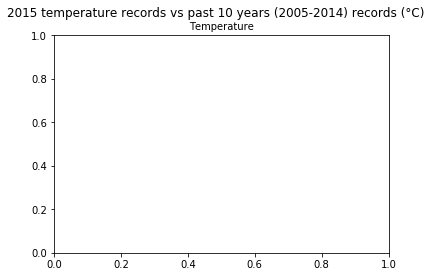

In [23]:
%matplotlib  inline
plt.suptitle("2015 temperature records vs past 10 years (2005-2014) records (°C)", fontsize=12)
plt.title("Temperature", fontsize=10)

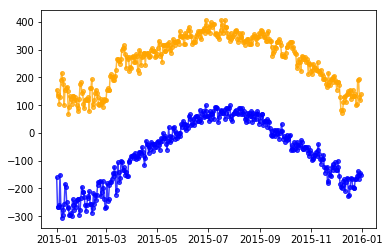

In [25]:
#Past record temperatures
plt.plot(observation_axis, df_min, '-o', color='blue', ms=4, alpha=0.75) 
plt.plot(observation_axis, df_max, '-o', color='orange', ms=4, alpha=0.75) 

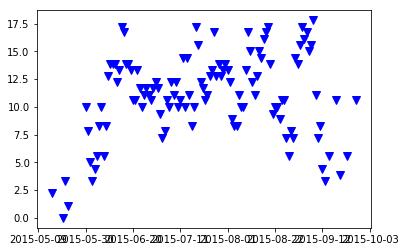

In [26]:
#2015 record temperatures
plt.plot(observation_axis[max_rec_broken], data_2015_max[max_rec_broken].as_matrix(), 'r^',
         observation_axis[min_rec_broken], data_2015_min[min_rec_broken].as_matrix(), 'bv', 
         ms=8, alpha=1.0)

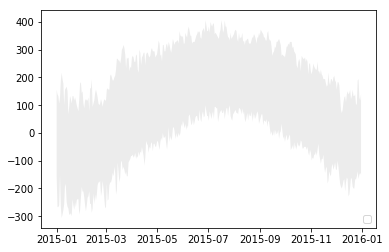

In [30]:
# matplotlib: change the current axis instance (i.e., gca())

plt.legend(['Past Record Lows', 'Past Record Highs', "2015 record Highs", "2015 record Lows"], loc=4, prop={'size':10})

plt.gca().fill_between(observation_axis, df_min, df_max, facecolor='grey', alpha=0.15)